In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

Bdata = pd.read_csv("Data/Batting.csv")


# Bdata.head()

## Batting: 1871-2019

In [2]:
Bdata

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [3]:
#number of teams played 
team=Bdata["teamID"].nunique()
team

149

In [4]:
#Finding average of hit, run and strikeouts for each team 

Hit= Bdata.groupby("teamID").H.mean()
Run= Bdata.groupby("teamID").R.mean()
Homerun= Bdata.groupby("teamID").HR.mean()
Strikeouts= Bdata.groupby("teamID").SO.mean()

B_Analysis = pd.DataFrame({"Hit":(Hit),
                        "Run":(Run),
                         "Homerun":(Homerun),
                        "Strikeouts":(Strikeouts)
                        })
B_Analysis= B_Analysis.sort_values("Hit",ascending=False)
B_Analysis["Hit"] = B_Analysis["Hit"].astype(float).map("{:,.2f}".format)
B_Analysis["Run"] = B_Analysis["Run"].astype(float).map("{:,.2f}".format)
B_Analysis["Homerun"] = B_Analysis["Homerun"].astype(float).map("{:,.2f}".format)
B_Analysis["Strikeouts"] = B_Analysis["Strikeouts"].astype(float).map("{:,.2f}".format)
B_Analysis

,Hit,Run,Homerun,Strikeouts
teamID,,,,
PHP,84.38,58.81,3.06,20.06
CHP,81.94,55.38,1.94,25.62
BRP,79.53,56.71,2.00,21.71
NYP,77.39,56.56,3.67,20.22
BSP,75.11,57.28,3.22,24.94
...,...,...,...,...
MLU,7.33,4.42,0.00,nan
WS4,7.07,5.71,0.00,0.21
WIL,4.55,1.75,0.10,nan


In [5]:
#Fill nan values with 0
filled= B_Analysis.replace('nan','0')
filled

,Hit,Run,Homerun,Strikeouts
teamID,,,,
PHP,84.38,58.81,3.06,20.06
CHP,81.94,55.38,1.94,25.62
BRP,79.53,56.71,2.00,21.71
NYP,77.39,56.56,3.67,20.22
BSP,75.11,57.28,3.22,24.94
...,...,...,...,...
MLU,7.33,4.42,0.00,0
WS4,7.07,5.71,0.00,0.21
WIL,4.55,1.75,0.10,0


In [6]:
#changing values from string to float
filled[["Hit","Run","Homerun","Strikeouts"]]=filled[["Hit","Run","Homerun","Strikeouts"]].apply(pd.to_numeric)
filled.dtypes

Hit           float64
Run           float64
Homerun       float64
Strikeouts    float64
dtype: object

In [7]:
#finding top 10 team using Hit and Run score
top10=filled.head(10)
top10

,Hit,Run,Homerun,Strikeouts
teamID,,,,
PHP,84.38,58.81,3.06,20.06
CHP,81.94,55.38,1.94,25.62
BRP,79.53,56.71,2.00,21.71
NYP,77.39,56.56,3.67,20.22
BSP,75.11,57.28,3.22,24.94
BS1,71.33,55.64,0.95,2.78
PTP,71.29,49.94,2.06,22.41
CLP,65.24,40.43,1.29,16.43
BLN,62.64,39.05,0.97,12.49


<AxesSubplot:xlabel='teamID', ylabel='Average Scores'>

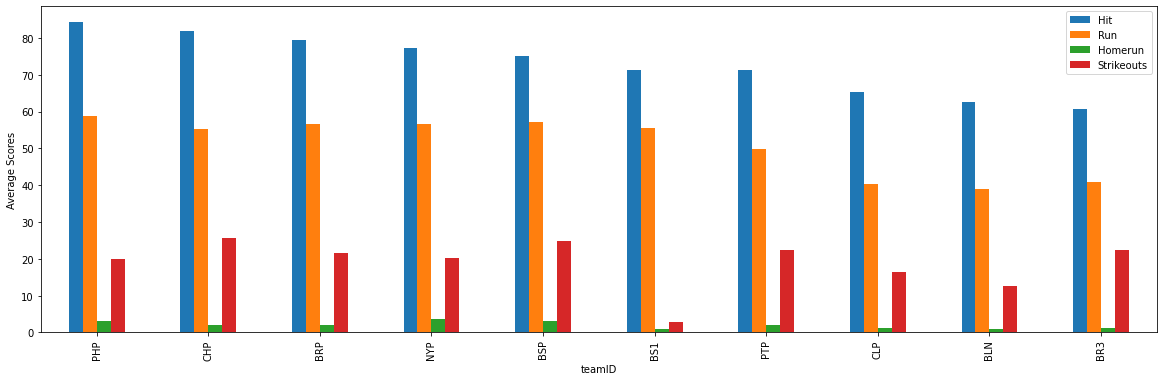

In [8]:
# Generate a bar plot showing the teams vs average scores to see overall trend

top10.plot(ylabel="Average Scores",kind='bar', figsize=(20,6)) 


<AxesSubplot:xlabel='teamID', ylabel='Average Scores'>

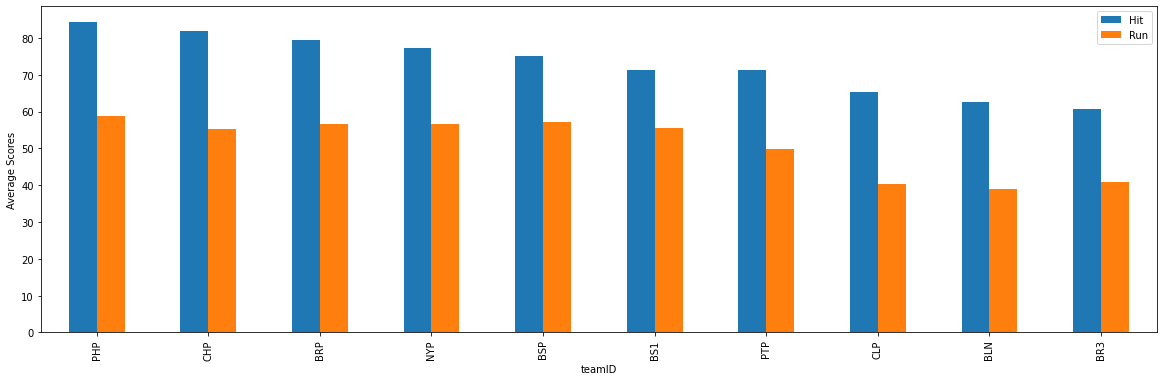

In [9]:
# Generate a bar plot showing the teams vs average scores to see correlation between hit and run scores

top10.plot(y=["Hit","Run"],ylabel="Average Scores",kind='bar', figsize=(20,6))

## data from 2010 to 2019

In [10]:
#pulling data from 2010 to 2019
last5yr = Bdata.loc[(2014 < Bdata['yearID']) & (Bdata['yearID']  < 2020)] 
last5yr

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
99863,aardsda01,2015,1,ATL,NL,33,1,0,0,0,...,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0
99864,abadfe01,2015,1,OAK,AL,62,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
99865,abreujo02,2015,1,CHA,AL,154,613,88,178,34,...,101.0,0.0,0.0,39,140.0,11.0,15.0,0.0,1.0,16.0
99866,achteaj01,2015,1,MIN,AL,11,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
99867,ackledu01,2015,1,SEA,AL,85,186,22,40,8,...,19.0,2.0,2.0,14,38.0,0.0,1.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,27.0,0.0,0.0,17,39.0,0.0,0.0,0.0,2.0,4.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,17.0,0.0,0.0,23,24.0,0.0,1.0,0.0,2.0,6.0


In [11]:
#how many team are there in the last 10 year?
last5yr["teamID"].nunique()


30

In [12]:
#teams name from 2010-2019
teamdata = last5yr["teamID"].unique()
teamdata

array(['ATL', 'OAK', 'CHA', 'MIN', 'SEA', 'NYA', 'COL', 'CLE', 'SLN',
       'CIN', 'SFN', 'ARI', 'TOR', 'TEX', 'DET', 'CHN', 'KCA', 'SDN',
       'PHI', 'HOU', 'NYN', 'BAL', 'MIA', 'LAA', 'PIT', 'LAN', 'TBA',
       'BOS', 'MIL', 'WAS'], dtype=object)

In [13]:
#teams name from 1871-2019: top 10 team based on Hit and run sore
top10.index


Index(['PHP', 'CHP', 'BRP', 'NYP', 'BSP', 'BS1', 'PTP', 'CLP', 'BLN', 'BR3'], dtype='object', name='teamID')

In [14]:
#in these top 10 team, the year they played were from 1871-1899
data = Bdata.loc[Bdata["teamID"].isin(['PHP', 'CHP', 'BRP', 'NYP', 'BSP', 'BS1', 'PTP', 'CLP', 'BLN', 'BR3'])]
data

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
7,barnero01,1871,1,BS1,NaN,31,157,66,63,10,...,34.0,11.0,6.0,13,1.0,NaN,NaN,NaN,NaN,1.0
9,barrofr01,1871,1,BS1,NaN,18,86,13,13,2,...,11.0,1.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
21,birdsda01,1871,1,BS1,NaN,29,152,51,46,3,...,24.0,6.0,0.0,4,4.0,NaN,NaN,NaN,NaN,1.0
27,conefr01,1871,1,BS1,NaN,19,77,17,20,3,...,16.0,12.0,1.0,8,2.0,NaN,NaN,NaN,NaN,1.0
48,gouldch01,1871,1,BS1,NaN,31,151,38,43,9,...,32.0,6.0,2.0,3,1.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7839,robinwi01,1899,1,BLN,NL,108,356,40,101,15,...,47.0,5.0,NaN,31,25.0,NaN,2.0,6.0,NaN,NaN
7841,rothebo01,1899,1,BLN,NL,10,21,1,2,0,...,3.0,0.0,NaN,1,1.0,NaN,0.0,1.0,NaN,NaN
7842,ryanja01,1899,1,BLN,NL,2,4,0,2,1,...,1.0,1.0,NaN,0,0.0,NaN,0.0,0.0,NaN,NaN
7854,sheckji01,1899,1,BLN,NL,147,536,104,158,18,...,75.0,77.0,NaN,56,51.0,NaN,18.0,6.0,NaN,NaN


In [15]:
#Observation: 
    #the team from 1871 to 2019 data has changed overtime. 
    #all those don't exist anymore. therefore, I go forward with the most current data using teams in the last 5 years to move forward.
    

In [16]:
#Average score of each team in each year
Hit_df= last5yr.groupby(["teamID",'yearID']).H.mean()
Run_df= last5yr.groupby(["teamID",'yearID']).R.mean()

Analysis = pd.DataFrame({"Hit":(Hit_df),
                        "Run":(Run_df)
                        })

Analysis

Hit        Run
teamID yearID                      
ARI    2015    29.880000  14.400000
       2016    29.580000  15.040000
       2017    31.222222  18.044444
       2018    26.183673  14.142857
       2019    31.533333  18.066667
...                  ...        ...
WAS    2015    30.977273  15.977273
       2016    32.627907  17.744186
       2017    30.142857  16.714286
       2018    26.452830  14.547170
       2019    29.200000  17.460000

[150 rows x 2 columns]

In [17]:
d= Analysis.reset_index()
d

,teamID,yearID,Hit,Run
0,ARI,2015,29.880000,14.400000
1,ARI,2016,29.580000,15.040000
2,ARI,2017,31.222222,18.044444
3,ARI,2018,26.183673,14.142857
4,ARI,2019,31.533333,18.066667
...,...,...,...,...
145,WAS,2015,30.977273,15.977273
146,WAS,2016,32.627907,17.744186
147,WAS,2017,30.142857,16.714286
148,WAS,2018,26.452830,14.547170


In [18]:
teamdata

array(['ATL', 'OAK', 'CHA', 'MIN', 'SEA', 'NYA', 'COL', 'CLE', 'SLN',
       'CIN', 'SFN', 'ARI', 'TOR', 'TEX', 'DET', 'CHN', 'KCA', 'SDN',
       'PHI', 'HOU', 'NYN', 'BAL', 'MIA', 'LAA', 'PIT', 'LAN', 'TBA',
       'BOS', 'MIL', 'WAS'], dtype=object)

In [19]:
#pulling data for ATL team
name= d.loc[d['teamID']=='ATL']
name

,teamID,yearID,Hit,Run
5,ATL,2015,22.683333,9.550000
6,ATL,2016,23.400000,10.816667
7,ATL,2017,29.938776,14.938776
8,ATL,2018,24.288136,12.864407
9,ATL,2019,28.640000,17.100000


y = 1.71x + -3445.65


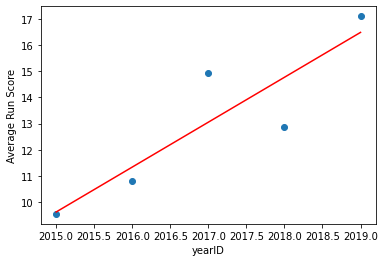

In [20]:
#graph to get trendline
correlation = st.pearsonr(name['yearID'],name["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(name['yearID'],name["Run"])
regress_values = name['yearID'] * slope + intercept
ATL_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(name['yearID'],name["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(name['yearID'],regress_values,"r-")
print(ATL_line_eq)
plt.show()


slopes=[]

slopes.append(slope)

y = 0.96x + -1930.66


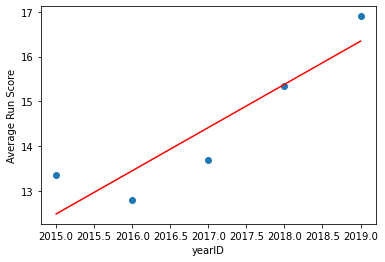

In [21]:
OAK= d.loc[d['teamID']=='OAK']
correlation = st.pearsonr(OAK['yearID'],OAK["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(OAK['yearID'],OAK["Run"])
regress_values = OAK['yearID'] * slope + intercept
OAK_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(OAK['yearID'],OAK["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(OAK['yearID'],regress_values,"r-")
print(OAK_line_eq)
plt.show()


slopes.append(slope)

y = -0.18x + 383.24


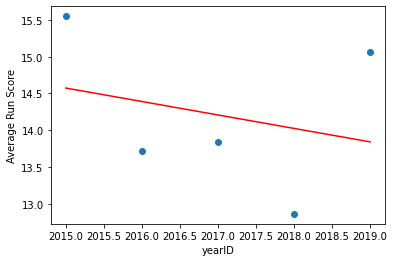

In [22]:
#Pulling Data for SEA team
CHA= d.loc[d['teamID']=='CHA']

#graph
correlation = st.pearsonr(CHA['yearID'],CHA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CHA['yearID'],CHA["Run"])
regress_values = CHA['yearID'] * slope + intercept
CHA_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(CHA['yearID'],CHA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")
plt.plot(CHA['yearID'],regress_values,"r-")
print(CHA_line_eq)
plt.show()


slopes.append(slope)

y = 0.49x + -963.64


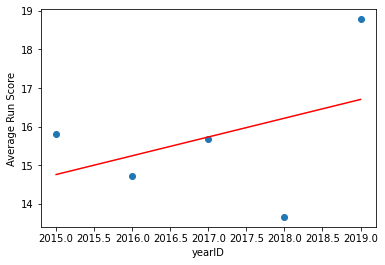

In [23]:
#Pulling Data for SEA team
MIN= d.loc[d['teamID']=='MIN']

#graph
correlation = st.pearsonr(MIN['yearID'],MIN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(MIN['yearID'],MIN["Run"])
regress_values = MIN['yearID'] * slope + intercept
MIN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(MIN['yearID'],MIN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")
plt.plot(MIN['yearID'],regress_values,"r-")
print(MIN_line_eq)
plt.show()

slopes.append(slope)

y = -0.45x + 929.88


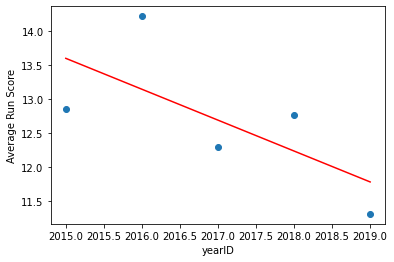

In [24]:
#Pulling Data for SEA team
SEA= d.loc[d['teamID']=='SEA']

#graph
correlation = st.pearsonr(SEA['yearID'],SEA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SEA['yearID'],SEA["Run"])
regress_values = SEA['yearID'] * slope + intercept
SEA_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SEA['yearID'],SEA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")
# print(f"The r-value is: {rvalue}")
#plt.annotate(line_eq,(1),fontsize=5,color="red")
plt.plot(SEA['yearID'],regress_values,"r-")
print(SEA_line_eq)
plt.show()


slopes.append(slope)

y = 1.18x + -2370.56


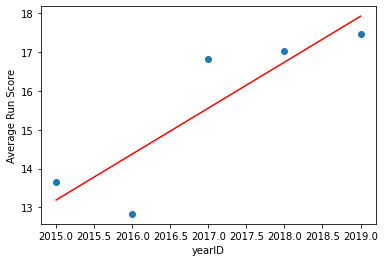

In [25]:
NYA= d.loc[d['teamID']=='NYA']
correlation = st.pearsonr(NYA['yearID'],NYA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(NYA['yearID'],NYA["Run"])
regress_values = NYA['yearID'] * slope + intercept
NYA_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(NYA['yearID'],NYA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(NYA['yearID'],regress_values,"r-")
print(NYA_line_eq)
plt.show()

slopes.append(slope)

y = 0.55x + -1100.52


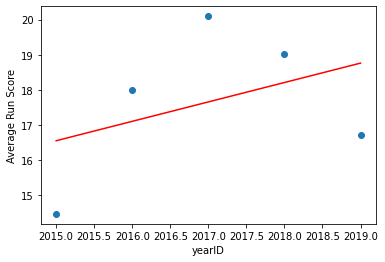

In [26]:
COL= d.loc[d['teamID']=='COL']
correlation = st.pearsonr(COL['yearID'],COL["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(COL['yearID'],COL["Run"])
regress_values = COL['yearID'] * slope + intercept
COL_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(COL['yearID'],COL["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(COL['yearID'],regress_values,"r-")
print(COL_line_eq)
plt.show()

slopes.append(slope)

y = 0.2x + -389.76


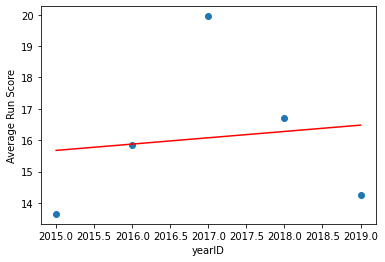

In [27]:
CLE= d.loc[d['teamID']=='CLE']
correlation = st.pearsonr(CLE['yearID'],CLE["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CLE['yearID'],CLE["Run"])
regress_values = CLE['yearID'] * slope + intercept
CLE_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(CLE['yearID'],CLE["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(CLE['yearID'],regress_values,"r-")
print(CLE_line_eq)
plt.show()


slopes.append(slope)

y = 0.39x + -769.03


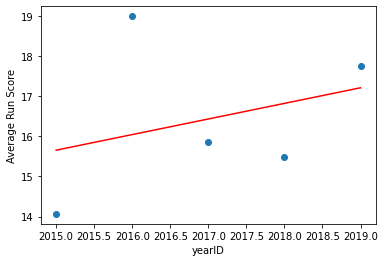

In [28]:
SLN= d.loc[d['teamID']=='SLN']
correlation = st.pearsonr(SLN['yearID'],SLN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SLN['yearID'],SLN["Run"])
regress_values = SLN['yearID'] * slope + intercept
SLN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SLN['yearID'],SLN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(SLN['yearID'],regress_values,"r-")
print(SLN_line_eq)
plt.show()


slopes.append(slope)

y = 0.36x + -710.51


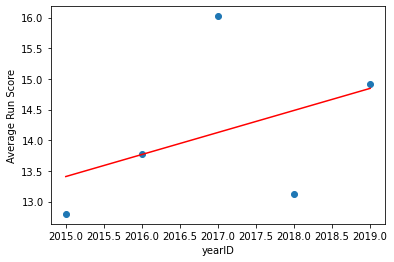

In [29]:
CIN= d.loc[d['teamID']=='CIN']
correlation = st.pearsonr(CIN['yearID'],CIN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CIN['yearID'],CIN["Run"])
regress_values = CIN['yearID'] * slope + intercept
CIN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(CIN['yearID'],CIN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(CIN['yearID'],regress_values,"r-")
print(CIN_line_eq)
plt.show()


slopes.append(slope)

y = -1.11x + 2260.03


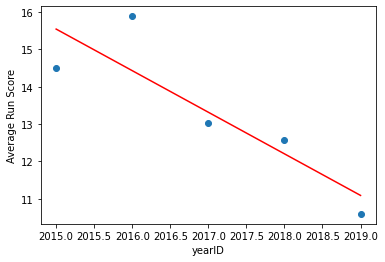

In [30]:
SFN= d.loc[d['teamID']=='SFN']
correlation = st.pearsonr(SFN['yearID'],SFN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SFN['yearID'],SFN["Run"])
regress_values = SFN['yearID'] * slope + intercept
SFN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SFN['yearID'],SFN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(SFN['yearID'],regress_values,"r-")
print(SFN_line_eq)
plt.show()


slopes.append(slope)

y = 0.64x + -1282.24


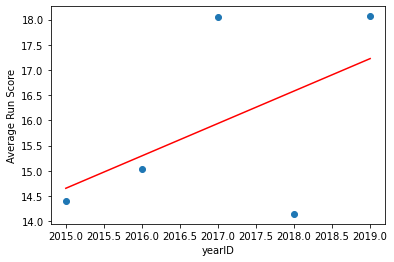

In [31]:
#Pulling Data for ARI team
ARI= d.loc[d['teamID']=='ARI']
#graph
correlation = st.pearsonr(ARI['yearID'],ARI["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(ARI['yearID'],ARI["Run"])
regress_values = ARI['yearID'] * slope + intercept
ARI_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(ARI['yearID'],ARI["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")
plt.plot(ARI['yearID'],regress_values,"r-")
print(ARI_line_eq)
plt.show()


slopes.append(slope)

y = -1.47x + 2978.81


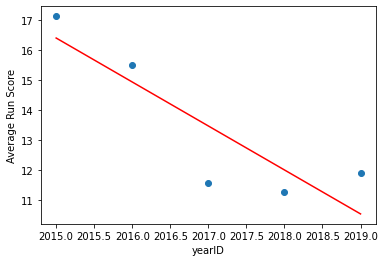

In [32]:
TOR= d.loc[d['teamID']=='TOR']
correlation = st.pearsonr(TOR['yearID'],TOR["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(TOR['yearID'],TOR["Run"])
regress_values = TOR['yearID'] * slope + intercept
TOR_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(TOR['yearID'],TOR["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(TOR['yearID'],regress_values,"r-")
print(TOR_line_eq)
plt.show()


slopes.append(slope)

y = 0.42x + -841.22


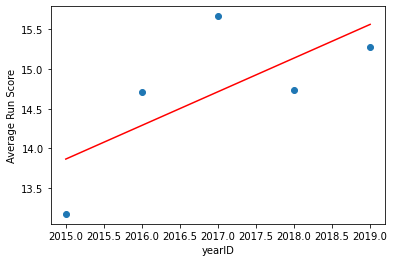

In [33]:
TEX= d.loc[d['teamID']=='TEX']
correlation = st.pearsonr(TEX['yearID'],TEX["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(TEX['yearID'],TEX["Run"])
regress_values = TEX['yearID'] * slope + intercept
TEX_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(TEX['yearID'],TEX["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(TEX['yearID'],regress_values,"r-")
print(TEX_line_eq)
plt.show()


slopes.append(slope)

y = -1.15x + 2342.77


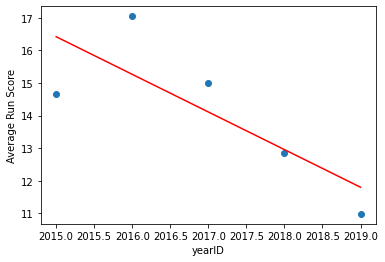

In [34]:
DET= d.loc[d['teamID']=='DET']
correlation = st.pearsonr(DET['yearID'],DET["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(DET['yearID'],DET["Run"])
regress_values = DET['yearID'] * slope + intercept
DET_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(DET['yearID'],DET["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")
plt.plot(DET['yearID'],regress_values,"r-")
print(DET_line_eq)
plt.show()



slopes.append(slope)

y = 0.1x + -188.13


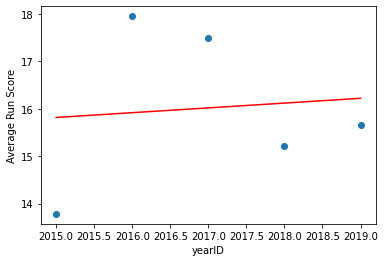

In [35]:
CHN= d.loc[d['teamID']=='CHN']
correlation = st.pearsonr(CHN['yearID'],CHN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(CHN['yearID'],CHN["Run"])
regress_values = CHN['yearID'] * slope + intercept
CHN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(CHN['yearID'],CHN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(CHN['yearID'],regress_values,"r-")
print(CHN_line_eq)
plt.show()


slopes.append(slope)

y = -0.81x + 1654.59


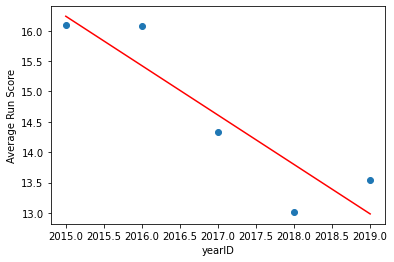

In [36]:
KCA= d.loc[d['teamID']=='KCA']
correlation = st.pearsonr(KCA['yearID'],KCA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(KCA['yearID'],KCA["Run"])
regress_values = KCA['yearID'] * slope + intercept
KCA_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(KCA['yearID'],KCA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(KCA['yearID'],regress_values,"r-")
print(KCA_line_eq)
plt.show()


slopes.append(slope)

y = -0.22x + 463.83


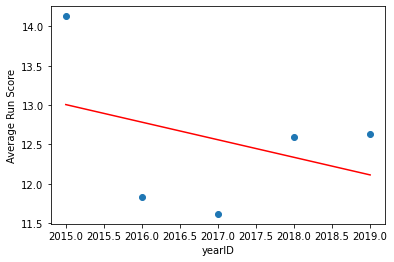

In [37]:
SDN= d.loc[d['teamID']=='SDN']
correlation = st.pearsonr(SDN['yearID'],SDN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(SDN['yearID'],SDN["Run"])
regress_values = SDN['yearID'] * slope + intercept
SDN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(SDN['yearID'],SDN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(SDN['yearID'],regress_values,"r-")
print(SDN_line_eq)
plt.show()

slopes.append(slope)

y = 0.43x + -845.56


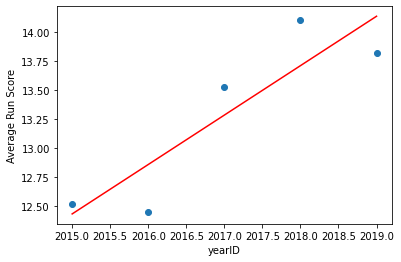

In [38]:
PHI= d.loc[d['teamID']=='PHI']
correlation = st.pearsonr(PHI['yearID'],PHI["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(PHI['yearID'],PHI["Run"])
regress_values = PHI['yearID'] * slope + intercept
PHI_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(PHI['yearID'],PHI["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(PHI['yearID'],regress_values,"r-")
print(PHI_line_eq)
plt.show()


slopes.append(slope)

y = 1.18x + -2360.65


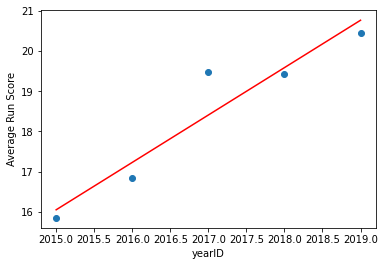

In [39]:
HOU= d.loc[d['teamID']=='HOU']
correlation = st.pearsonr(HOU['yearID'],HOU["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(HOU['yearID'],HOU["Run"])
regress_values = HOU['yearID'] * slope + intercept
HOU_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(HOU['yearID'],HOU["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(HOU['yearID'],regress_values,"r-")
print(HOU_line_eq)
plt.show()


slopes.append(slope)

y = 0.0x + 11.15


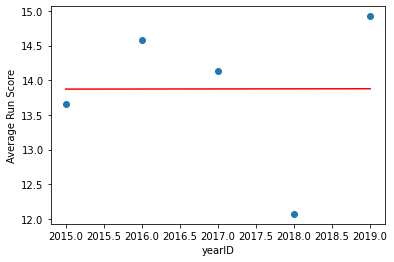

In [40]:
NYN= d.loc[d['teamID']=='NYN']
correlation = st.pearsonr(NYN['yearID'],NYN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(NYN['yearID'],NYN["Run"])
regress_values = NYN['yearID'] * slope + intercept
NYN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(NYN['yearID'],NYN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(NYN['yearID'],regress_values,"r-")
print(NYN_line_eq)
plt.show()


slopes.append(slope)

y = -0.93x + 1888.25


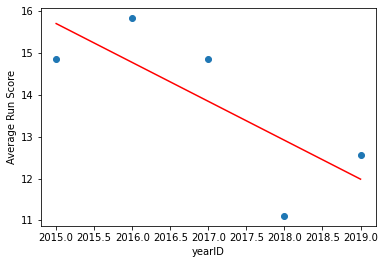

In [41]:
BAL= d.loc[d['teamID']=='BAL']
correlation = st.pearsonr(BAL['yearID'],BAL["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(BAL['yearID'],BAL["Run"])
regress_values = BAL['yearID'] * slope + intercept
BAL_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(BAL['yearID'],BAL["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(BAL['yearID'],regress_values,"r-")
print(BAL_line_eq)
plt.show()


slopes.append(slope)

y = -0.02x + 63.42


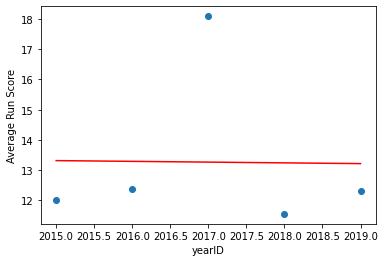

In [42]:
MIA= d.loc[d['teamID']=='MIA']
correlation = st.pearsonr(MIA['yearID'],MIA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(MIA['yearID'],MIA["Run"])
regress_values = MIA['yearID'] * slope + intercept
MIA_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(MIA['yearID'],MIA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(MIA['yearID'],regress_values,"r-")
print(MIA_line_eq)
plt.show()


slopes.append(slope)

y = -0.05x + 103.9


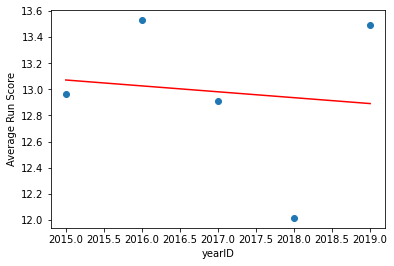

In [43]:
LAA= d.loc[d['teamID']=='LAA']
correlation = st.pearsonr(LAA['yearID'],LAA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(LAA['yearID'],LAA["Run"])
regress_values = LAA['yearID'] * slope + intercept
LAA_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(LAA['yearID'],LAA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(LAA['yearID'],regress_values,"r-")
print(LAA_line_eq)
plt.show()



slopes.append(slope)

y = -0.11x + 229.66


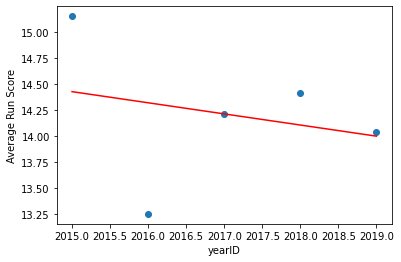

In [44]:
PIT= d.loc[d['teamID']=='PIT']
correlation = st.pearsonr(PIT['yearID'],PIT["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(PIT['yearID'],PIT["Run"])
regress_values = PIT['yearID'] * slope + intercept
PIT_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(PIT['yearID'],PIT["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(PIT['yearID'],regress_values,"r-")
print(PIT_line_eq)
plt.show()


slopes.append(slope)

y = 1.65x + -3322.54


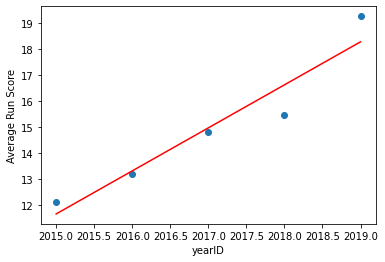

In [45]:
LAN= d.loc[d['teamID']=='LAN']
correlation = st.pearsonr(LAN['yearID'],LAN["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(LAN['yearID'],LAN["Run"])
regress_values = LAN['yearID'] * slope + intercept
LAN_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(LAN['yearID'],LAN["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(LAN['yearID'],regress_values,"r-")
print(LAN_line_eq)
plt.show()



slopes.append(slope)

y = 0.1x + -185.75


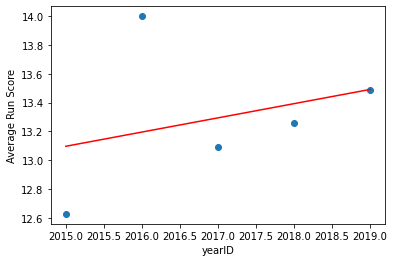

In [46]:
TBA= d.loc[d['teamID']=='TBA']
correlation = st.pearsonr(TBA['yearID'],TBA["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(TBA['yearID'],TBA["Run"])
regress_values = TBA['yearID'] * slope + intercept
TBA_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(TBA['yearID'],TBA["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(TBA['yearID'],regress_values,"r-")
print(TBA_line_eq)
plt.show()



slopes.append(slope)

y = 1.14x + -2273.08


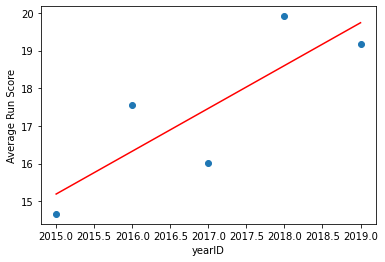

In [47]:
BOS= d.loc[d['teamID']=='BOS']
correlation = st.pearsonr(BOS['yearID'],BOS["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(BOS['yearID'],BOS["Run"])
regress_values = BOS['yearID'] * slope + intercept
BOS_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(BOS['yearID'],BOS["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(BOS['yearID'],regress_values,"r-")
print(BOS_line_eq)
plt.show()



slopes.append(slope)

y = 0.48x + -960.35


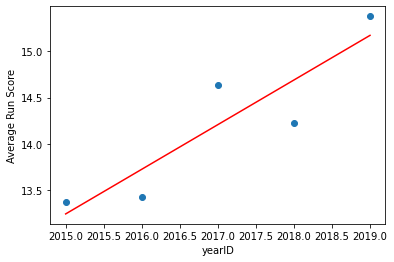

In [48]:
MIL= d.loc[d['teamID']=='MIL']
correlation = st.pearsonr(MIL['yearID'],MIL["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(MIL['yearID'],MIL["Run"])
regress_values = MIL['yearID'] * slope + intercept
MIL_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(MIL['yearID'],MIL["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(MIL['yearID'],regress_values,"r-")
print(MIL_line_eq)
plt.show()



slopes.append(slope)

y = -0.02x + 63.19


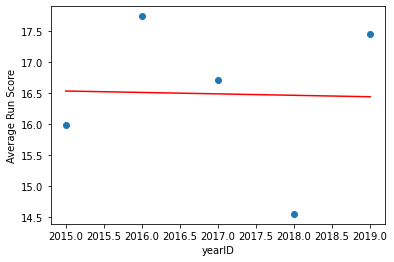

In [49]:

WAS= d.loc[d['teamID']=='WAS']
correlation = st.pearsonr(WAS['yearID'],WAS["Run"])
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(WAS['yearID'],WAS["Run"])
regress_values = WAS['yearID'] * slope + intercept
WAS_line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(WAS['yearID'],WAS["Run"])
plt.xlabel("yearID")
plt.ylabel("Average Run Score")

plt.plot(WAS['yearID'],regress_values,"r-")
print(WAS_line_eq)
plt.show()




slopes.append(slope)

In [50]:
slopes

[1.7147740112994354,
 0.9643393380574287,
 -0.1829595327492699,
 0.4855609152752012,
 -0.4547261840998486,
 1.1830022960966355,
 0.5543706055333392,
 0.2012093726379437,
 0.38942448566888843,
 0.35926319365098947,
 -1.113888888888889,
 0.6436190476190475,
 -1.470177974510527,
 0.4243622081328141,
 -1.1545196473538504,
 0.10121367521367529,
 -0.813075897025477,
 -0.22373597781608048,
 0.4258044217687076,
 1.179505180289416,
 0.0013528653463023234,
 -0.929304667575027,
 -0.024868664446910674,
 -0.04507477072258901,
 -0.10681525398916723,
 1.6546913955609608,
 0.09868134388258235,
 1.1356183107672475,
 0.4831721216788605,
 -0.023156168973632596]

In [55]:
#collecting all slopes from the graphs above
Data = pd.DataFrame({
                    "Team":(teamdata),
                    "Slopes":(slopes)
                     })
Data= Data.sort_values("Slopes",ascending=False)
Data

,Team,Slopes
0,ATL,1.714774
25,LAN,1.654691
5,NYA,1.183002
19,HOU,1.179505
27,BOS,1.135618
1,OAK,0.964339
11,ARI,0.643619
6,COL,0.554371
3,MIN,0.485561
28,MIL,0.483172


In [60]:
top10_strong_teams=Data.head(10)
top10_strong_teams
Topteams= top10_strong_teams.reset_index()
Top_10teams=Topteams.drop(['index'], axis=1)
Top_10teams

,Team,Slopes
0,ATL,1.714774
1,LAN,1.654691
2,NYA,1.183002
3,HOU,1.179505
4,BOS,1.135618
5,OAK,0.964339
6,ARI,0.643619
7,COL,0.554371
8,MIN,0.485561
9,MIL,0.483172


In [ ]:
#Summary:
    # After get all data for each team, applied scatterplot to obtain each trend-line of each team to see how they performed in the last 5 years
    # With the trend-line, slope of line were collected to compare
    # team with higher slope means they scored better and witl have higher potential with this trend.
    # Therefore, the top 10 team with highest slope were drawn using Batching file.